In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname
import datetime as dt
from random import randint
from datetime import date
from pandas.api.types import CategoricalDtype
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA

notebook_path = os.path.abspath("Notebook_Cedrik_FeatureEngineering.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-datenexploration.csv")

In [33]:
df = pd.read_csv (csv_path, low_memory=False)
df_features = df
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56,2015


# Anforderungen an Projektumsetzung: Feature Engineering

## Erstellen Sie mindestens zwei neue Features

### Encoding

In [34]:
# One-Hot Encoding für unser kategorischehs Feature state(failed, successful, canceled)
# Zunaechst werden die Zeilen mit den Werten suspended, undefined und live entfernt, 
# da diese wenig aussagekräftig sind für den Erfolg eines Projekts und nur einen kleinen Teil ausmachen
df_features.drop(df_features[(df.state == "suspended") | (df_features.state == "undefined") | (df_features.state == "live") | (df_features.country == 'N,0"')].index, inplace=True)
df_features = pd.concat([df_features.drop('state', axis=1), pd.get_dummies(df_features['state'])], axis=1)
df_features = pd.concat([df_features.drop('main_category', axis=1), pd.get_dummies(df_features['main_category'])], axis=1)
df_features = pd.concat([df_features.drop('category', axis=1), pd.get_dummies(df_features['category'])], axis=1)
df_features = pd.concat([df_features.drop('currency', axis=1), pd.get_dummies(df_features['currency'])], axis=1)
df_features = pd.concat([df_features.drop('country', axis=1), pd.get_dummies(df_features['country'])], axis=1)

In [35]:
df_features.head()

,ID,name,deadline,goal,launched,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0.0,0.0,1533.95,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,100.0,2421.0,30000.00,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,220.0,220.0,45000.00,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,1.0,1.0,5000.00,...,0,0,0,0,0,0,0,0,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,1283.0,1283.0,19500.00,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#OneHot Encoding kategorien

In [37]:
# Normalisierung der numerischen Werte
df_features['usd_pledged_real_scaled'] = (df_features['usd_pledged_real'] - df_features['usd_pledged_real'].min()) /\
                                         (df_features['usd_pledged_real'].max() - df_features['usd_pledged_real'].min())
df_features['usd_goal_real_scaled'] = (df_features['usd_goal_real'] - df_features['usd_goal_real'].min()) /\
                                      (df_features['usd_goal_real'].max() - df_features['usd_goal_real'].min())
df_features.drop(columns=["usd_pledged_real","usd_goal_real","usd pledged","pledged","goal"], inplace=True)
df_features.head()

,ID,name,deadline,launched,backers,duration,year,canceled,failed,successful,...,LU,MX,NL,NO,NZ,SE,SG,US,usd_pledged_real_scaled,usd_goal_real_scaled
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,2015-08-11 12:12:28,0,59,2015,0,1,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.000009
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,2017-09-02 04:43:57,15,60,2017,0,1,0,...,0,0,0,0,0,0,0,1,1.190325e-04,0.000180
2,1000004038,Where is Hank?,2013-02-26,2013-01-12 00:20:50,3,45,2013,0,1,0,...,0,0,0,0,0,0,0,1,1.081666e-05,0.000270
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,2012-03-17 03:24:11,1,30,2012,0,1,0,...,0,0,0,0,0,0,0,1,4.916666e-08,0.000030
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,2015-07-04 08:35:03,14,56,2015,1,0,0,...,0,0,0,0,0,0,0,1,6.308082e-05,0.000117


In [38]:
df_features.head()

,ID,name,deadline,launched,backers,duration,year,canceled,failed,successful,...,LU,MX,NL,NO,NZ,SE,SG,US,usd_pledged_real_scaled,usd_goal_real_scaled
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,2015-08-11 12:12:28,0,59,2015,0,1,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.000009
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,2017-09-02 04:43:57,15,60,2017,0,1,0,...,0,0,0,0,0,0,0,1,1.190325e-04,0.000180
2,1000004038,Where is Hank?,2013-02-26,2013-01-12 00:20:50,3,45,2013,0,1,0,...,0,0,0,0,0,0,0,1,1.081666e-05,0.000270
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,2012-03-17 03:24:11,1,30,2012,0,1,0,...,0,0,0,0,0,0,0,1,4.916666e-08,0.000030
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,2015-07-04 08:35:03,14,56,2015,1,0,0,...,0,0,0,0,0,0,0,1,6.308082e-05,0.000117


In [39]:
#drop non numerical features
df_features_numerical = df_features.drop(columns=["ID","name","deadline","launched","year"])
df_features_numerical.head()


,backers,duration,canceled,failed,successful,Art,Comics,Crafts,Dance,Design,...,LU,MX,NL,NO,NZ,SE,SG,US,usd_pledged_real_scaled,usd_goal_real_scaled
0,0,59,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.000009
1,15,60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.190325e-04,0.000180
2,3,45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.081666e-05,0.000270
3,1,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.916666e-08,0.000030
4,14,56,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6.308082e-05,0.000117


In [40]:
#convert to same datatype float and drop all nan
df_features_numerical = df_features_numerical.astype('float64')
df_features_numerical = df_features_numerical.dropna()

In [94]:
#search for Nan in Dataframe as error occurs
df_features_numerical.isnull().values.any()
pd.DataFrame(data=df_features_numerical)
df_features_pca = df_features_numerical
#df_features_pca.drop(columns=['AUD','CAD','CHF','DKK','EUR','GBP','HKD','JPY','MXN','NOK','NZD','SEK','SGD','USD',
#                              'AT','AU','BE','CA','CH','DE','DK','ES','FR','GB','HK','IE','IT','JP','LU','MX','NL',
#                              'NO','NZ','SE','SG','US'], inplace=True)
df_features_pca_dropped = df_features_pca[['backers','duration','failed','successful','usd_pledged_real_scaled','usd_goal_real_scaled',
                                           'Art','Comics','Crafts','Dance','Design','Fashion','Film & Video','Food','Games','Journalism',
                                           'Music','Photography','Publishing','Technology','Theater']]
df_features_pca_dropped = df_features_pca_dropped.loc[:,~df_features_pca_dropped.columns.duplicated()]
df_features_pca_dropped.info()
df_features_pca_dropped.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370222 entries, 0 to 378660
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   backers                  370222 non-null  float64
 1   duration                 370222 non-null  float64
 2   failed                   370222 non-null  float64
 3   successful               370222 non-null  float64
 4   usd_pledged_real_scaled  370222 non-null  float64
 5   usd_goal_real_scaled     370222 non-null  float64
 6   Art                      370222 non-null  float64
 7   Comics                   370222 non-null  float64
 8   Crafts                   370222 non-null  float64
 9   Dance                    370222 non-null  float64
 10  Design                   370222 non-null  float64
 11  Fashion                  370222 non-null  float64
 12  Film & Video             370222 non-null  float64
 13  Food                     370222 non-null  float64
 14  Game

,backers,duration,failed,successful,usd_pledged_real_scaled,usd_goal_real_scaled,Art,Comics,Crafts,Dance,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0.0,59.0,1.0,0.0,0.000000e+00,0.000009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15.0,60.0,1.0,0.0,1.190325e-04,0.000180,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,45.0,1.0,0.0,1.081666e-05,0.000270,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,30.0,1.0,0.0,4.916666e-08,0.000030,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14.0,56.0,0.0,0.0,6.308082e-05,0.000117,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#Anwendung von PCA zur Dimesnionsreduzierung und amnschließendes Plotten der cluster als Scatter diagramm
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_features_pca_dropped)
principalDF =pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

In [72]:
principalDF.head()

,principal component 1,principal component 2
0,-106.987546,24.586493
1,-91.987603,25.587386
2,-103.986785,10.586732
3,-105.985967,-4.413389
4,-92.987327,21.587221


In [83]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99561824 0.00438012]
[556898.26536863  36937.92296865]


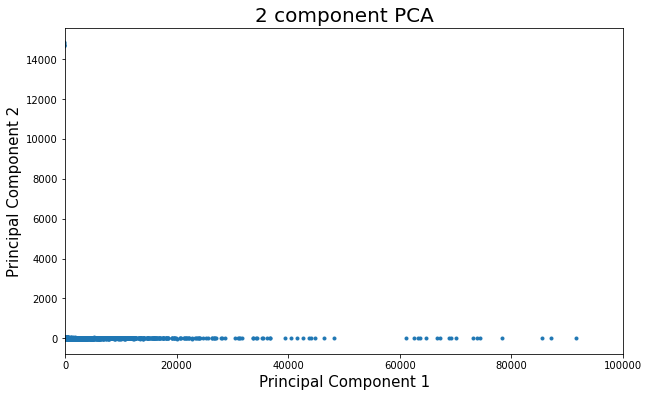

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.xlim([0,100000])
ax.scatter(x=principalDF['principal component 1'], y=principalDF['principal component 2'], marker='.')
plt.show()

In [46]:
#feature clustering with kmeans
#1simples clustering nach 2 ausgewählten features: backers und usd goal pledgfed
kmeans = KMeans(n_clusters=3, random_state=0)
df_features_numerical['cluster'] = kmeans.fit_predict(df_features_numerical[["backers","usd_pledged_real_scaled"]])


In [47]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_features_numerical['cen_x'] = df_features_numerical.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_features_numerical['cen_y'] = df_features_numerical.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df_features_numerical.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

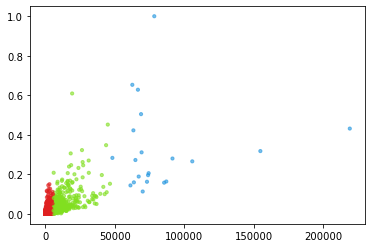

In [48]:
plt.scatter(df_features_numerical.backers, df_features_numerical.usd_pledged_real_scaled, c=df.c, alpha = 0.6, s=10)

In [49]:
#Evaluation ohne Zielkalsse: 
#inertia(Trägheit) der Cluster: Abstands jedes Datenpunkts zu seinem Cluster-Zentroiden. Je geringer die inertia, desto kompakter die Cluster.
#Silhouette Coefficient: Je höher also der Wert, desto besser die Cluster.

inertia = kmeans.inertia_

print(inertia)



90527091925.58965


## Dimensionsreduzierung mit PCA/T-sne


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold

notebook_path = os.path.abspath("DataAnalyticsKickstarterNotebook_Cedrik.ipynb")
csv_path_features = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-klassifikation-features.csv")
csv_path_trueLabels = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-klassifikation-target.csv")

In [3]:
df_features = pd.read_csv (csv_path_features, low_memory=False)
df_target = pd.read_csv (csv_path_trueLabels, low_memory=False)

In [4]:
df_features.head()


,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,1.981553e-05,0.208791,0.221053,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3.302593e-05,0.153846,0.336842,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.302534e-06,0.142857,0.368421,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.301939e-07,0.076923,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.321033e-05,0.879121,0.473684,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
df_target.head()

,ID,successful
0,558744194,1
1,134175247,1
2,1577455391,1
3,171893227,1
4,499552311,1


In [6]:
df_features['target'] = df_target['successful']
df_features

,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,target
0,1.981553e-05,0.208791,0.221053,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,3.302593e-05,0.153846,0.336842,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3.302534e-06,0.142857,0.368421,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3.301939e-07,0.076923,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1.321033e-05,0.879121,0.473684,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129575,5.573435e-05,0.318681,0.557895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
129576,1.831556e-03,0.296703,0.263158,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129577,3.302593e-05,0.461538,0.589474,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129578,1.708825e-05,0.318681,0.147368,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
X_train, X_dev, y_train, y_dev = train_test_split(df_features.iloc[: ,0:19], df_features.iloc[: , -1], random_state=42)

In [37]:

y_train.shape

(97185,)

# Dimensionsreduzierung mit PCA und Testen auf SVM mit kleinem Datensatz

In [39]:
#Anwendung von PCA zur Dimesnionsreduzierung und amnschließendes Plotten der cluster als Scatter diagramm
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.pipeline import Pipeline


dim_reduction = PCA(n_components=5)
#klassifizierer wählen
classifier = svm.SVC(C=10, gamma=1)
                     
#Pipeline erstellen
pipeline = Pipeline([('dim_reduction', dim_reduction),
                     ('classifier', classifier)])

#Modell trainieren
pipeline.fit(X_train, y_train)



Pipeline(steps=[('dim_reduction', PCA(n_components=5)),
                ('classifier', SVC(C=10, gamma=1))])

In [40]:
print(dim_reduction.explained_variance_ratio_)

[0.27284644 0.11859045 0.10008682 0.07756835 0.07239652]


In [41]:
#Vorhersdagen für Testdaten
predicted = pipeline.predict(X_dev)
print(f"Classification report for VarianceThreshold dimensionality reduction:\n"
      f"{metrics.classification_report(y_dev, predicted)}\n")

Classification report for VarianceThreshold dimensionality reduction:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     15302
           1       0.71      0.68      0.69     17093

    accuracy                           0.69     32395
   macro avg       0.69      0.69      0.69     32395
weighted avg       0.69      0.69      0.69     32395




In [42]:
pd.crosstab(y_dev, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,10663,4639,15302
1,5524,11569,17093
All,16187,16208,32395


# Vergleichen der Ergebnisse der Dimensionsreduzierung auf XGBoost Algorithmus

In [8]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.pipeline import Pipeline

In [43]:
dim_reduction = PCA(n_components=5, whiten=True)
#klassifizierer wählen
classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=10, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, 
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None)

#Pipeline erstellen
pipeline = Pipeline([('dim_reduction', dim_reduction),
                     ('classifier', classifier)])

pipeline.fit(X_train, y_train)


[14:14:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('dim_reduction', PCA(n_components=5, whiten=True)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=10, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                             

In [44]:
print(dim_reduction.explained_variance_ratio_)

[0.27284644 0.11859044 0.10008682 0.0775682  0.07239648]


In [45]:
#Vorhersdagen für Testdaten
predicted = pipeline.predict(X_dev)
print(f"Classification report for VarianceThreshold dimensionality reduction:\n"
      f"{metrics.classification_report(y_dev, predicted)}\n")

Classification report for VarianceThreshold dimensionality reduction:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     15302
           1       0.73      0.72      0.72     17093

    accuracy                           0.71     32395
   macro avg       0.71      0.71      0.71     32395
weighted avg       0.71      0.71      0.71     32395




In [46]:
pd.crosstab(y_dev, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,10652,4650,15302
1,4801,12292,17093
All,15453,16942,32395


# T-Sne Dimensionsreduzierung



In [56]:
from sklearn.manifold import TSNE
import seaborn as sns
dim_reduction = TSNE(n_components = 2, n_iter=250)

X_embedded = dim_reduction.fit_transform(X_train,y_train)


In [53]:
#Dimensionsreduzierung mit t-sne
dim_reduction = TSNE(n_components = 5, n_iter=250)

#klassifizierer wählen
classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=10, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, 
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None)
                     
#Pipeline erstellen
pipeline = Pipeline([('dim_reduction', dim_reduction),
                     ('classifier', classifier)])

#Modell trainieren
pipeline.fit(X_train, y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(n_components=5, n_iter=250)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't

In [86]:
X_embedded.shape

(370222, 2)

In [91]:
print(X_embedded)
print(X_embedded[0,1])

[[-1.9117754   0.14853366]
 [ 1.5053171   1.5648876 ]
 [-2.4090886  -0.1702205 ]
 ...
 [-1.9361998  -0.41035357]
 [ 0.80056804  1.973793  ]
 [-0.17797384 -0.2965507 ]]
0.14853366


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

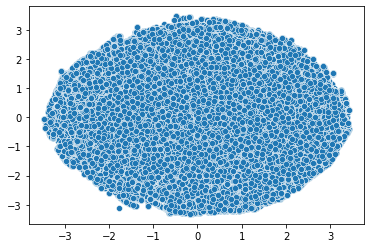

In [92]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

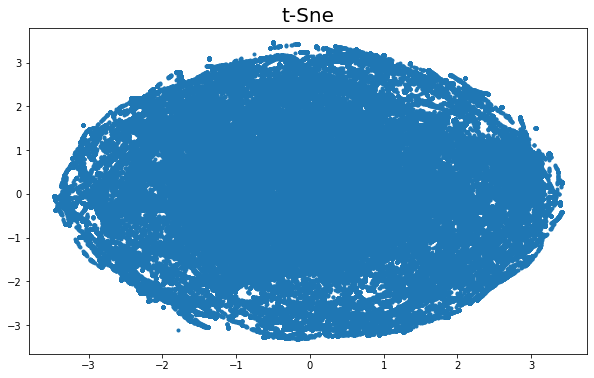

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('t-Sne', fontsize = 20)
#plt.xlim([0,100000])
ax.scatter(x=X_embedded[:,0], y=X_embedded[:,1], marker='.')
plt.show()